**DATA DESCRIPTION:**
1) *For the dataset "players.csv":*

   The dataset "players.csv" contains 196 observations and 7 variables. The variables contain the following information:
   - experience (categorical) - player’s skill level (Beginner/Amateur/Regular/Veteran/Pro)
   - subscribe (boolean) - whether the player subscribed (TRUE/FALSE)
   - hashedEmail (string) - anonymized player email
   - played_hours (numeric) - total hours spent playing
   - name (string) - player’s name
   - gender (categorical) - player's gender
   - Age (numeric) - player’s age in years (2 missing values)

   Players are mostly young (median 19 years), and 73.47% are subscribed. The variable played_hours has a mean of 5.85, median of 0.10, and maximum of 223.10, indicating that a few users with very high play hours dominate this variable. Data quality issues include missing Age entries for 2 observations, possible age misreporting, and outliers in play hours. Potential issues involve unclear data collection methods, possible duplicate accounts, and uncertainty about how played_hours was recorded.
   
3) *For the dataset "sessions.csv":*

   The dataset "sessions.csv" contains 1535 observations and 5 variables. The variables contain the following information:
   - hashedEmail (string) - anonymized player email
   - start_time (string) - Session start timestamp in “DD/MM/YYYY HH:MM” format.
   - end_time (string) - Session end timestamp in “DD/MM/YYYY HH:MM” format.
   - original_start_time (numeric) - Time for session start.
   - original_end_time (numeric) - Time for session end.

   It records anonymized player identifiers along with session start and end times, in both readable datetime format and numeric epoch format. Data quality issues include missing end_time values for 2 observations, no duration field so it must be calculated, and no session_id to uniquely identify each session. Potential issues include unclear data collection methods, timezone inconsistencies, and possible duplicates or unlogged sessions.

**QUESTIONS:**   
  
  The broad question I will address is - *What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?*  
The specific question I have formulated is - *Can a player’s experience level, age, gender, and played hours predict whether they subscribe to the newsletter in the dataset "players.csv"?*  
The dataset contains the necessary information, with subscribe as the response variable and experience, Age, gender, and played_hours as explanatory variables. To prepare the data for analysis, I will convert categorical variables like experience and gender into numeric variables, handle any missing values, and ensure that all variables are in the correct format for KNN classification. To answer the second part of the broad question "How do these features differ between various player types?" I will focus on how played_hours and subscription rates vary across different experience levels, highlighting differences in behavior among player types.

**EXPLORATORY DATA ANALYSIS AND VISUALIZATION:**   
  
  Following is the code to load the dataset, do the minimum wrangling, compute the mean values and make a few visualizations.

,experience,subscribe,hashed_email,played_hours,name,gender,age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


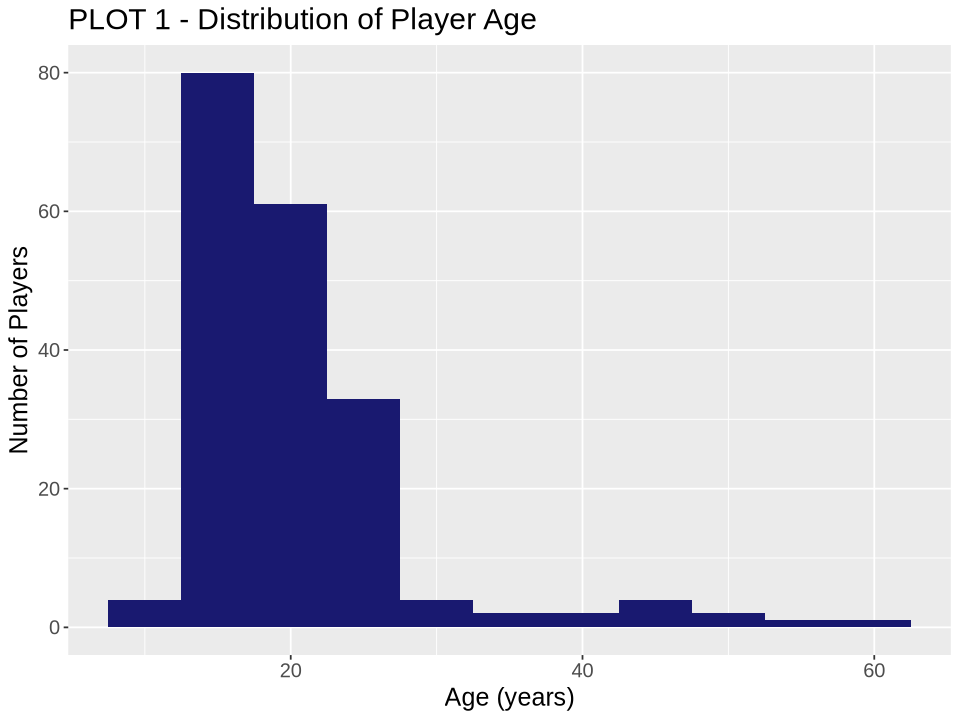

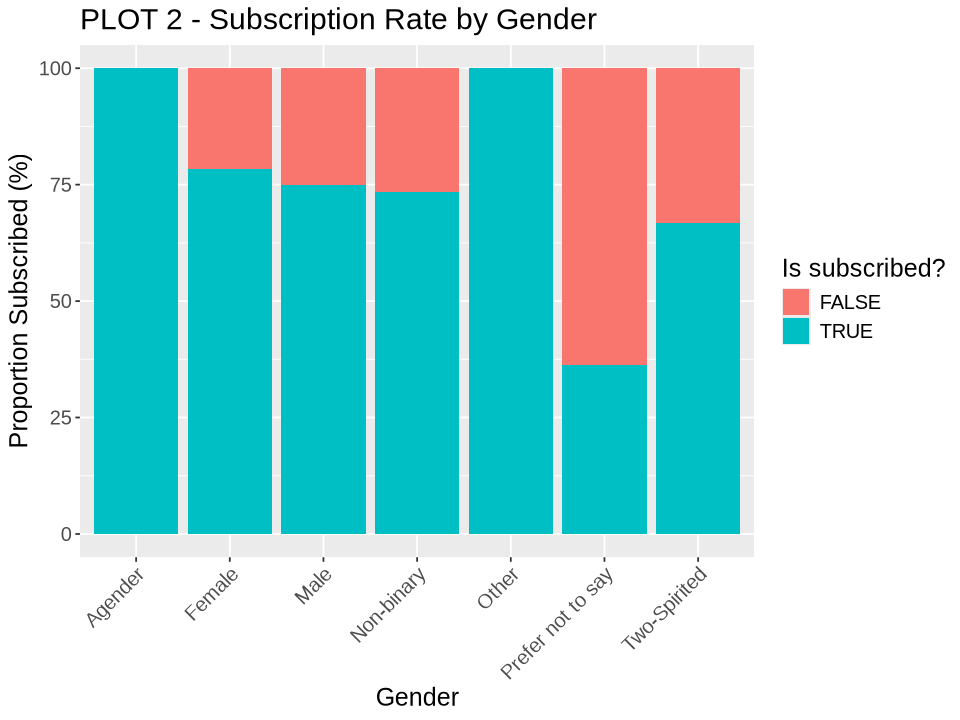

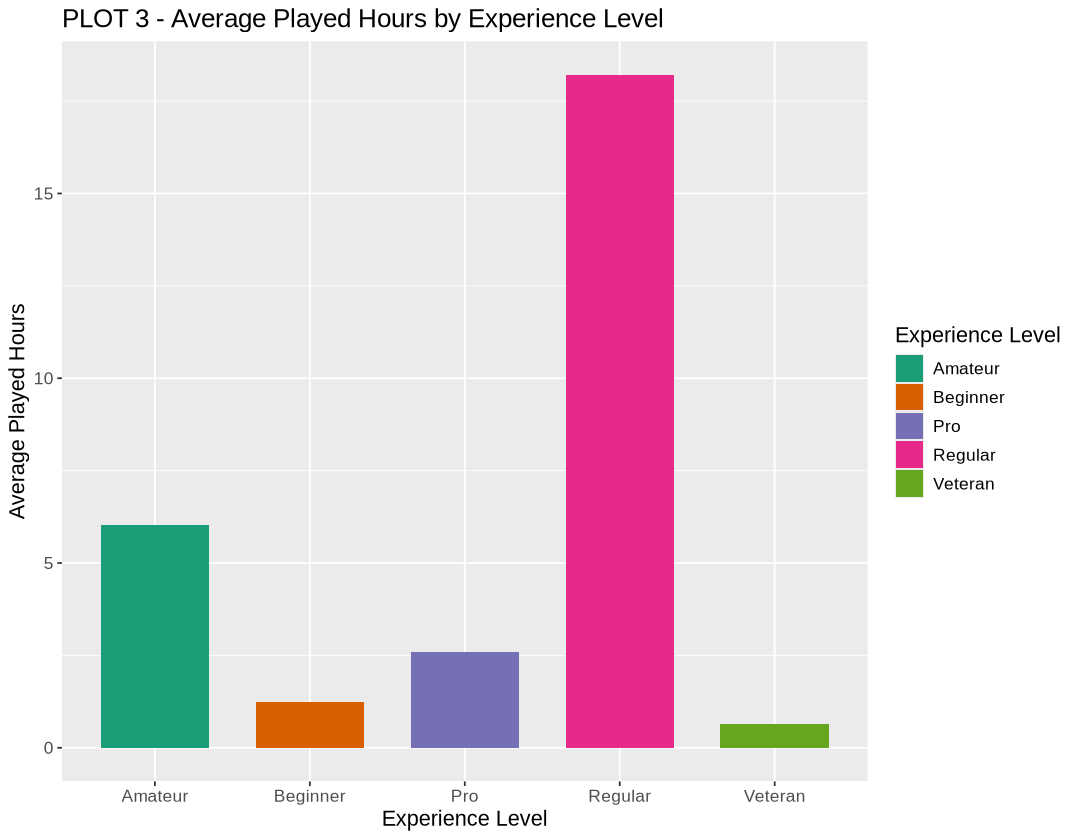

In [63]:
library(tidyverse)
library(janitor)
library(RColorBrewer)

# Load the dataset
players <- read.csv("players.csv")

# Standardize column names to make it tidy
players <- clean_names(players)

# View the first few rows
head(players)

# Convert categorical variables using mutate
players <- players |>
  mutate(experience = as.factor(experience),
        gender = as.factor(gender),
        subscribe = as.factor(subscribe))

# Compute mean values
means_players <- players |>
  summarise(mean_age = mean(age, na.rm = TRUE),
            mean_played_hours = mean(played_hours, na.rm = TRUE))

# Print in table format
means_players

# Following are some plots of exploratory visualizations to understand the data

# Plot of age distribution
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(players, aes(x = age)) +
    geom_histogram(binwidth = 5, fill = "midnightblue") +
    labs(title = "PLOT 1 - Distribution of Player Age", x = "Age (years)", y = "Number of Players") +
    theme(text = element_text(size = 15))

# Plot of subscription rate by gender
players_proportion <- players |>
    group_by(gender, subscribe) |>
    summarise(count = n(), .groups = "drop") |>
    group_by(gender) |>
    mutate(proportion = count / sum(count) * 100)
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(players_proportion, aes(x = gender, y = proportion, fill = subscribe)) +
    geom_bar(stat = "identity", position = "stack") +
    theme(text = element_text(size = 15), 
        axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(title = "PLOT 2 - Subscription Rate by Gender", x = "Gender", y = "Proportion Subscribed (%)", fill = "Is subscribed?")

# Plot of average played hours by experience level
players_summary <- players |>
    group_by(experience) |>
    summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))
options(repr.plot.width = 9, repr.plot.height = 7)
ggplot(players_summary, aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_bar(stat = "identity", width = 0.7) +
    theme(text = element_text(size = 13)) +
    labs(title = "PLOT 3 - Average Played Hours by Experience Level",
       x = "Experience Level",
       y = "Average Played Hours",
       fill = "Experience Level") +
    scale_fill_brewer(palette = "Dark2")

*Insights from the above made exploratory visualization plots:*
- Plot 1 - Most players are young, with many in their late teens and early twenties, showing that the game mainly attracts younger users.
- Plot 2 - All Agender and Other gender catergories are subscribed whereas players who chose Prefer not to say as their gender have the most proportion of unsubsc
- Plot 3 - Shows that players in the "Regular" category in experience have the highest played_hours whereas "Veteran" has the lowest.